# **双対上昇法の実装**

## ライブラリのインポート

In [1]:
##### 双対上昇法の実装 #####
import numpy as np
import matplotlib.pyplot as plt

## 関数の設定

In [2]:
## 目的関数の設定：入力は2次元ベクトル
def objf(x):
    f = x[0]**2 + 2 * x[1]**2
    return f

In [3]:
## phi(lambda)の微分
def dphi(lamb):
    dphi = -0.75 * lamb - 1
    return dphi

## 双対上昇法の実行

In [4]:
##初期値とパラメータの設定
x = np.array([2,2])
lamb0 = 1 #lambdaの初期値
f = objf(x)
eps = 1e-8 # 反復終了判定

In [5]:
## 更新履歴の格納
x1 = [] # x（x1成分）の更新履歴を格納
x2 = [] # x（x2成分）の更新履歴を格納
lamb_list = [] # lambda の更新履歴を格納
f_list = [] # fの更新履歴を格納
k = 0 # 反復更新回数

print('k = ',k, '(x,y) = ', x, 'lambda = ', lamb0, 'f(x,y) = ', f)
x1.append(x[0])
x2.append(x[1])
lamb_list.append(lamb0)
f_list.append(f)

k =  0 (x,y) =  [2 2] lambda =  1 f(x,y) =  12


In [6]:
### 反復更新
lambnew = lamb0 # 更新後の lambda の値を格納

while 1:
    k = k + 1 ## 繰り返し回数の更新
    lambold = lambnew ## 更新前のfの値

    x = np.array([-lambold/2, -lambold/4]) ## 更新後の x の値
    f = objf(x) ## 更新後の目的関数fの値
    lambnew = lambold + 0.01 * dphi(lambold) ## 更新後の lambda の値
    
    if k % 10 == 0:
        print('k = ',k, '(x,y) = ', x, 'lambda = ', lambnew, 'f(x,y) = ', f)
    
    x1.append(x[0])
    x2.append(x[1])
    lamb_list.append(lambnew)
    f_list.append(f)
 
    if (abs(lambnew-lambold) < eps):
        print('Final Result: (x,y) = ', x, 'lambda = ', lambnew, 'f(x,y) = ', f)
        break

k =  10 (x,y) =  [-0.42357162 -0.21178581] lambda =  0.8307896615239461 f(x,y) =  0.2691193732307997
k =  20 (x,y) =  [-0.34450894 -0.17225447] lambda =  0.6738502396109697 f(x,y) =  0.1780296113353859
k =  30 (x,y) =  [-0.27117978 -0.13558989] lambda =  0.5282918631417637 f(x,y) =  0.11030770955642048
k =  40 (x,y) =  [-0.20316836 -0.10158418] lambda =  0.3932891933084345 f(x,y) =  0.06191607336105216
k =  50 (x,y) =  [-0.14008904 -0.07004452] lambda =  0.2680767438141061 f(x,y) =  0.029437408568136085
k =  60 (x,y) =  [-0.08158415 -0.04079208] lambda =  0.15194454044564254 f(x,y) =  0.009983960629209124
k =  70 (x,y) =  [-0.02732196 -0.01366098] lambda =  0.04423409540858506 f(x,y) =  0.0011197344459215556
k =  80 (x,y) =  [0.0230052 0.0115026] lambda =  -0.0556653264018466 f(x,y) =  0.0007938589936058937
k =  90 (x,y) =  [0.06968271 0.03484135] lambda =  -0.14832017036451892 f(x,y) =  0.00728351916311995
k =  100 (x,y) =  [0.11297522 0.05648761] lambda =  -0.2342558039664613 f(x,y) 

## 結果のプロット

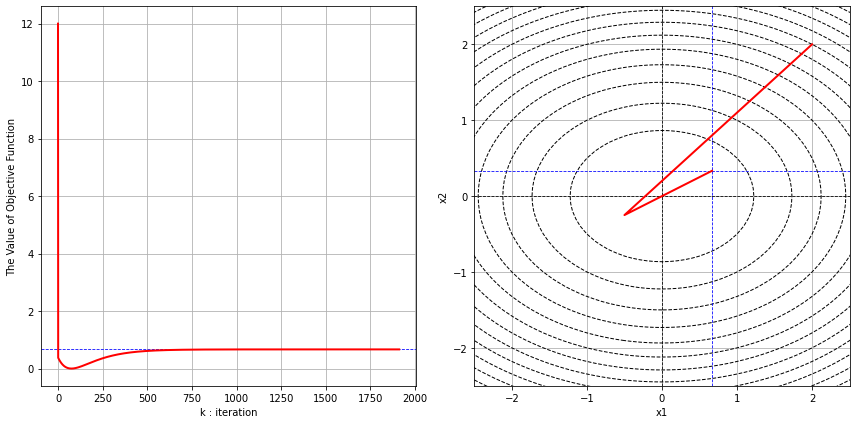

In [7]:
########## Plot the Result (1) ##########
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

## 目的関数 f の変化
ax1.axhline(y=2/3, color='blue', linestyle='--', linewidth=0.8)
ax1.plot(np.linspace(0, k, k+1),f_list,color='red',linewidth=2)
ax1.grid()
ax1.set_xlabel('k : iteration')
ax1.set_ylabel('The Value of Objective Function')

## 点xの変化と等高線
X,Y = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))
Z = X**2 + 2*Y**2
cont = ax2.contour(X,Y,Z,linewidths=1,colors='black',linestyles='dashed',levels=20)

ax2.axvline(x=0,color='black', linestyle='--', linewidth=0.8)
ax2.axhline(y=0,color='black', linestyle='--', linewidth=0.8)
ax2.axvline(x=2/3,color='blue', linestyle='--', linewidth=0.8)
ax2.axhline(y=1/3,color='blue', linestyle='--', linewidth=0.8)
ax2.plot(x1,x2,color='red',linewidth=2)
ax2.grid()
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(-2.5, 2.5)

fig.tight_layout()
fig.savefig('figure_objective_function.pdf')

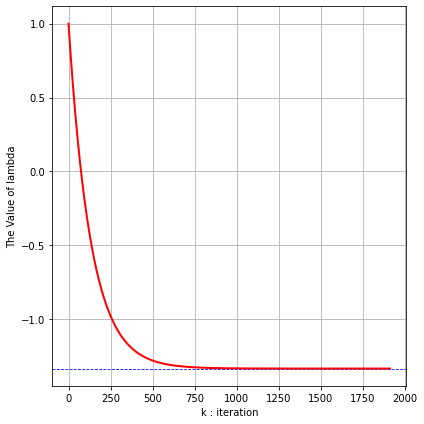

In [8]:
########## Plot the Result (2) ##########
## lambda の変化
fig_lamb = plt.figure(figsize=(6,6))
ax_lamb = fig_lamb.add_subplot(1, 1, 1)
ax_lamb.axhline(y=-4/3, color='blue', linestyle='--', linewidth=0.8)
ax_lamb.plot(np.linspace(0, k, k+1),lamb_list,color='red',linewidth=2)
ax_lamb.grid()
ax_lamb.set_xlabel('k : iteration')
ax_lamb.set_ylabel('The Value of lambda')

fig_lamb.tight_layout()
fig_lamb.savefig('figure_lambda.pdf')